In [10]:
	
import numpy as np
import boto3
import awswrangler as wr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Abres un cliente de S3
session = boto3.Session(profile_name='arquitectura')

In [17]:
query = '''
    SELECT *
    FROM econ.ind;
'''

df = wr.athena.read_sql_query(
    query, 
    database="econ", 
    ctas_approach=False,
    boto3_session=session
)

df.head()

,fecha,tdi,tdc,inf
0,2023-01-02,10.7700,19.488300,127.335999
1,2023-01-03,10.7775,19.422001,127.335999
2,2023-01-04,10.7770,19.356800,127.335999
3,2023-01-05,10.7663,19.367201,127.335999
4,2023-01-06,10.7680,19.175301,127.335999


In [18]:
def entrenar_modelo_regresion_lineal(X, Y):
    # Verificar que X e Y tienen el mismo tamaño
    if len(X) != len(Y):
        raise ValueError("X e Y deben tener el mismo tamaño.")
    # Reshape de X para asegurar la forma correcta
    X_reshaped = X.values.reshape(-1, 1)
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y, test_size=0.2, random_state=42)
    # Crear el modelo de regresión lineal
    modelo = LinearRegression()
    # Entrenar el modelo
    modelo.fit(X_train, Y_train)
    # Predecir utilizando el conjunto de prueba
    Y_pred = modelo.predict(X_test)
    # Calcular el error cuadrático medio para evaluar el modelo
    mse = mean_squared_error(Y_test, Y_pred)
    print("Modelo entrenado. Error Cuadrático Medio (MSE):", mse)
    return modelo

In [20]:
# tipo_de_cambio ~ tasa_de_interes
model_1 = entrenar_modelo_regresion_lineal(df['tdi'],df['tdc'])
model_2 = entrenar_modelo_regresion_lineal(df['tdi'],df['inf'])
model_3 = entrenar_modelo_regresion_lineal(df['tdc'],df['inf'])

Modelo entrenado. Error Cuadrático Medio (MSE): 0.1551606
Modelo entrenado. Error Cuadrático Medio (MSE): 0.94233465
Modelo entrenado. Error Cuadrático Medio (MSE): 0.91626304


In [22]:
def graficar_modelo_y_datos(X, Y, model):
    # Convertir X a numpy array si aún no lo es
    X_array = X.values.reshape(-1, 1) if hasattr(X, "values") else X
    # Generar valores X para la línea de regresión
    X_linea = np.linspace(X_array.min(), X_array.max(), 100).reshape(-1, 1)
    # Calcular valores Y para la línea de regresión
    Y_linea = model.predict(X_linea)
    # Graficar los datos originales
    plt.scatter(X, Y, color='blue', label='Datos originales')
    # Graficar la línea de regresión
    plt.plot(X_linea, Y_linea, color='red', label='Línea de regresión')
    # Agregar título y leyenda
    plt.title('Scatter Plot de los Datos y Línea de Regresión')
    plt.xlabel('X')
    plt.ylabel('Y')
    # Mostrar el gráfico
    plt.show()

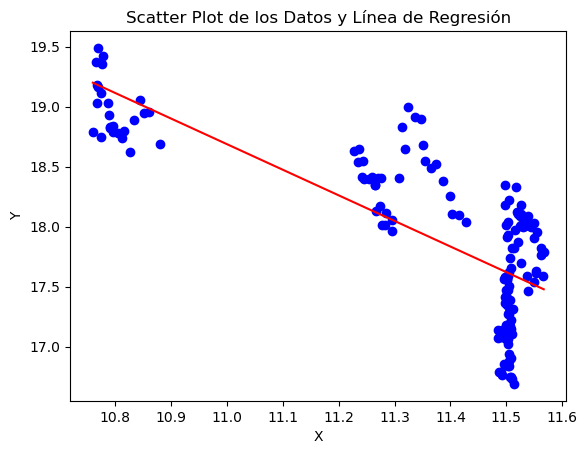

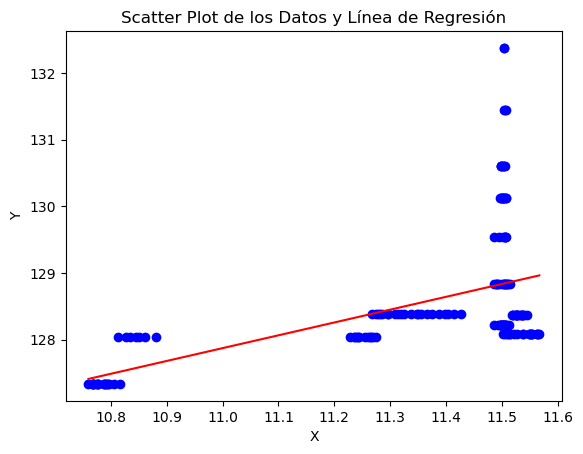

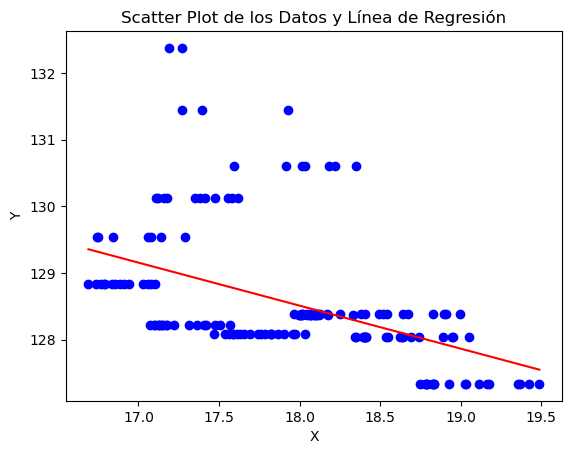

In [23]:
graficar_modelo_y_datos(df['tdi'],df['tdc'],model_1)
graficar_modelo_y_datos(df['tdi'],df['inf'],model_2)
graficar_modelo_y_datos(df['tdc'],df['inf'],model_3)